# Regression Models

### Init

In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### 1. About the dataset:
- features: 12 chemical properties of red wine
- goal: to predict the quality of each wine, range from 3 -8 (>6.5: good quality)

In [7]:
# data loading

df = pd.read_csv('./winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
quality_counts = df['quality'].value_counts(normalize=True) * 100  
print(quality_counts)

quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: proportion, dtype: float64


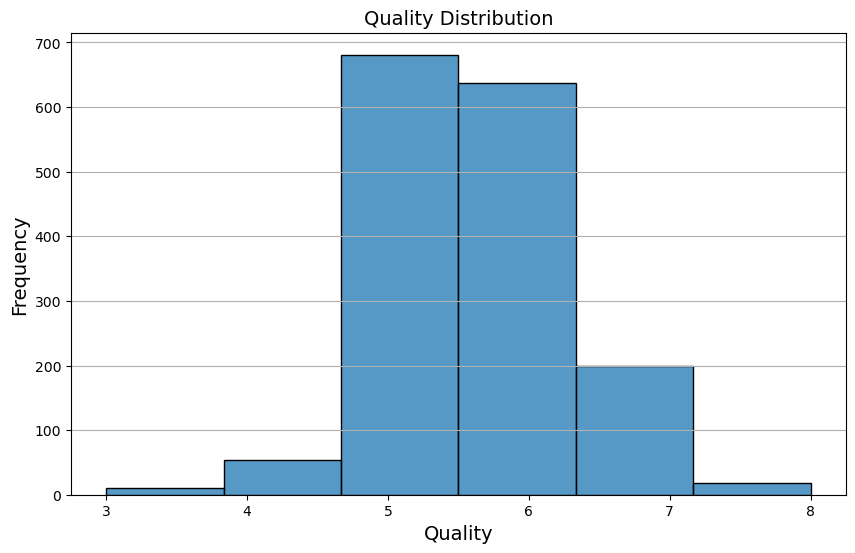

In [241]:
df['quality'].value_counts()

# data visualization

plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], bins=6, kde=False)
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(np.arange(3, 9, 1))
plt.grid(axis='y')
plt.show()

We can see that largest quality score was 8, and the least was 3. And the majority were rated at 6-7. 

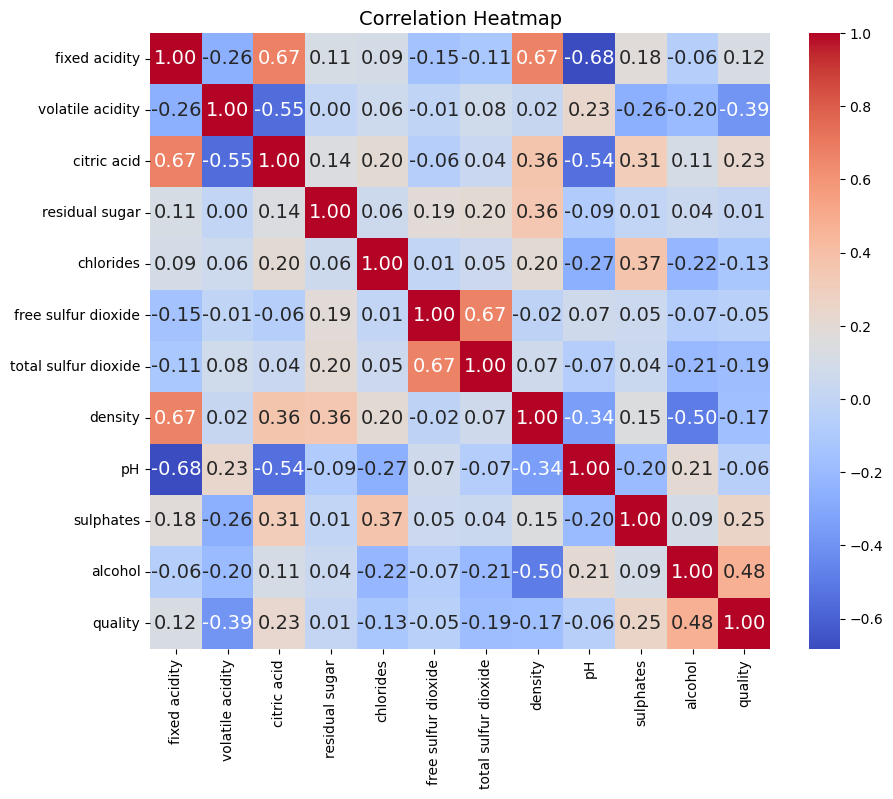

In [242]:
# data visualization

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Choose all 12 features

#### Split Dataset

Data is splitted into 3 parts: 60% for training, 20% for validation, 20% for testing
- We use the training data set for training the model.
- And use the validation data set for validate the model.
- We only use the testing data set when we found the best model.

In [12]:
# data classification

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


## 2 Plain Linear Regression

In [15]:
# training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(21.196783433916675,
 array([ 1.14800027e-02, -1.20926379e+00, -1.73136601e-01,  3.35398531e-02,
        -2.71371762e+00,  3.29302642e-03, -2.36835541e-03, -1.82570263e+01,
        -7.76287747e-02,  8.99857630e-01,  2.96343390e-01]))

In [17]:
y_pred = lin_reg.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_pred)
print("Valid MSE:", mse_valid)

Valid MSE: 0.4705178396425243


Plain LinearRegression solves the linear function directly:

$$ a_1x_1 + a_2x_2 + \dot + a_nx_n = y$$

### What if I just plit data into 2 parts: train and test --> MSE = 0.41

## 3 SGD Model
### 3.1 SGD without learning rate

In [18]:
sgd_reg = SGDRegressor(random_state=42)
sgd_reg.fit(X_train, y_train)

y_pred = sgd_reg.predict(X_valid)

mse_valid_sgd = mean_squared_error(y_valid, y_pred)

print("Valid MSE:", mse_valid_sgd)

Valid MSE: 2.796667644058625e+24


However, SGD picks only one training sample at each step to perform the gradient descent algorithm, \
which is fast, but is also difficult to find the best parameters.

#### MSE is too high 

#### 3.2 SGD with learning rate

In [19]:
sgd_regressor = SGDRegressor(eta0 = 0.0001, random_state=42)
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_valid)

mse_valid_sgd = mean_squared_error(y_valid, y_pred)

print("Valid MSE:", mse_valid_sgd)

Valid MSE: 0.531737527087394


MSE is improved by setting the `eta0` to 0.0001, which which reduces the step size for better performance.

In [20]:
param_grid = [{'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}]

sgd_regressor = SGDRegressor()
gridsearch = GridSearchCV(sgd_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

gridsearch.fit(X, y)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
gridsearch.best_params_

{'eta0': 0.0001}

In [22]:
gridsearch.best_estimator_

SGDRegressor(eta0=0.0001)

In [23]:
gridsearch.cv_results_

{'mean_fit_time': array([0.01143179, 0.00841479, 0.0082088 , 0.00614476, 0.00160027,
        0.00860724]),
 'std_fit_time': array([0.00585408, 0.0044545 , 0.00041376, 0.0031318 , 0.00320053,
        0.00417856]),
 'mean_score_time': array([4.70528603e-03, 1.59959793e-03, 3.24745178e-03, 1.59811974e-03,
        4.83608246e-03, 3.73840332e-05]),
 'std_score_time': array([3.05838634e-03, 3.19919586e-03, 3.97795023e-03, 3.19623947e-03,
        3.94912874e-03, 7.47680664e-05]),
 'param_eta0': masked_array(data=[1.0, 0.1, 0.01, 0.001, 0.0001, 2.0],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'eta0': 1},
  {'eta0': 0.1},
  {'eta0': 0.01},
  {'eta0': 0.001},
  {'eta0': 0.0001},
  {'eta0': 2}],
 'split0_test_score': array([-8.47727851e+27, -1.77717659e+27, -4.13835599e+21, -4.25558049e-01,
        -4.21763404e-01, -4.93240757e+29]),
 'split1_test_score': array([-7.07806465e+27, -8.07296772e+24, -8.27885622e+23, -5.89610180e-01,
        

In [24]:
gridsearch.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}],
             return_train_score=True, scoring='neg_mean_squared_error')>

In [25]:
gridsearch.best_score_

-0.5167863621485603

#### Why dont use MSE instead, what this number means -0.5120278514119164

GridsearchCV helps to find out the optimized  hyperparameter `eta0`, \
it indicates for this dataset, the smallest step 0.001 produces the best performance.

In [26]:
# function to draw a learning curve
def plot_learning_curve(model, title, upper_limit):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train, y_train,
        train_sizes=np.linspace(0.01, 1.0, 40),
        cv=5,
        scoring="neg_root_mean_squared_error"
    )

    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes/X_train.shape[0]*100, train_errors, "r-+", linewidth=2, label="Train RMSE")
    plt.plot(train_sizes/X_train.shape[0]*100, valid_errors, "b-", linewidth=2, label="Validation RMSE")
    plt.title(f"Learning Curve ({title})")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.legend(loc="upper right")
    plt.axis([0, 80, 0, upper_limit])
    plt.show()

### 3.3 Draw learning curve for Linear Regression

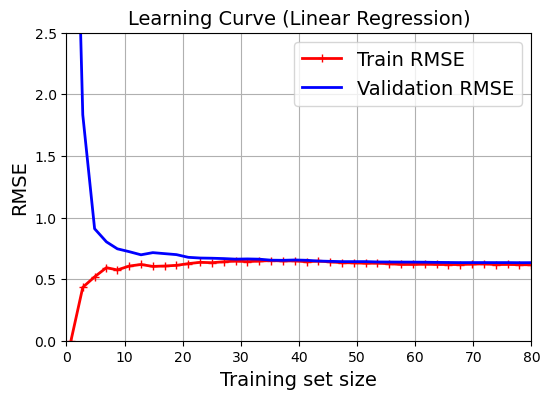

In [255]:
# draw learning curve
plot_learning_curve(LinearRegression(), "Linear Regression", 2.5)

### Is this a good performance or not? Why

## 4 Polynomial Models

In [27]:
# define polynomial regression model
def generate_polynomial_features(degree):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )

# What if we use StandarScaler in SDG model and Linear Regression?? 

In [28]:
# train polynomial regression model: degree 2
polynomial_regression = generate_polynomial_features(degree=2)
polynomial_regression.fit(X_train, y_train)

y_pred = polynomial_regression.predict(X_valid)

mse_valid_poly = mean_squared_error(y_valid, y_pred)

print("Valid MSE:", mse_valid_poly)


Valid MSE: 0.5408682109041276


In [33]:
# train polynomial regression model: degree 2
polynomial_regression = generate_polynomial_features(degree=3)
polynomial_regression.fit(X_train, y_train)

y_pred = polynomial_regression.predict(X_valid)

mse_valid_poly = mean_squared_error(y_valid, y_pred)

print("Valid MSE:", mse_valid_poly)


Valid MSE: 34.509145611113404


In [29]:
polynomial_regression.named_steps['linearregression'].intercept_, polynomial_regression.named_steps['linearregression'].coef_

(5.6400625978391306,
 array([-2.53494785e+02,  1.11415488e+02,  7.33015346e+01, -1.97609346e+01,
        -1.26330639e+02, -8.21223467e+01,  5.90695379e+01,  7.29797636e+01,
        -1.84767565e+02,  8.32529126e+00,  6.70845744e+01, -5.65975049e+00,
         1.04926866e+00,  1.95173995e+00, -4.45173943e-01, -1.35520458e+00,
         1.37891318e-01, -9.92725694e-01,  2.68733290e+02, -9.87110043e+00,
         4.85360175e-01,  3.29899269e+00, -2.19688582e-01, -8.59875726e-02,
        -9.10432982e-02, -3.78869718e-03, -2.58173474e-01,  5.31359581e-01,
        -1.13932957e+02,  2.51002752e+00, -3.24278981e-01, -6.22719489e-01,
        -8.78924323e-02,  6.00350922e-02,  7.65281270e-02,  7.25441789e-02,
         3.67129406e-02, -7.50661903e+01,  3.44666616e-01, -2.50698378e-01,
         3.02943818e-02, -1.60268763e-01,  5.46465001e-02, -2.55531382e-01,
         2.98469488e-01,  2.20046429e+01, -1.61278748e+00, -3.12666568e-01,
         2.91361673e-01, -3.17539307e-01, -2.40745977e-01,  4.45761

In [30]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scale', StandardScaler()),
    ('reg', LinearRegression())
])

param_grid = {
    'poly__degree': [2, 3, 4, 5]
}

gridsearch = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error', cv=5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scale', StandardScaler()),
                                       ('reg', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4, 5]},
             scoring='neg_root_mean_squared_error')

In [31]:
gridsearch.best_params_

{'poly__degree': 2}

In [34]:
# Calculate MSE for degrees 3, 4, and 5
for degree in [2,3, 4, 5]:
    polynomial_regression = generate_polynomial_features(degree=degree)
    polynomial_regression.fit(X_train, y_train)
    y_pred = polynomial_regression.predict(X_valid)
    mse_valid_poly = mean_squared_error(y_valid, y_pred)
    print(f"Valid MSE for degree {degree}: {mse_valid_poly}")

Valid MSE for degree 2: 0.5408682109041276
Valid MSE for degree 3: 34.509145611113404
Valid MSE for degree 4: 861.7205052486106
Valid MSE for degree 5: 664.7225088272893


GridSearchCV is also used for finding the best hyperparameter for Polynomial Regression.
Degree 2 outputs the best performance.

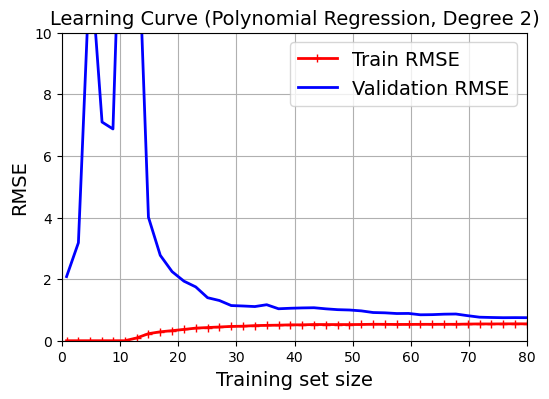

In [261]:
# draw learning curve
polynomial_regression = generate_polynomial_features(degree=2)
plot_learning_curve(polynomial_regression, "Polynomial Regression, Degree 2", 10)

The learning curve indicates a clear overfitting sign since \
the validation error is higher than training dataset.

## 5 Lasso Regularization

In [262]:
def generate_lasso_model(alpha):
    return make_pipeline(
        PolynomialFeatures(degree=2, include_bias=False),
        StandardScaler(),
        Lasso(alpha=alpha, max_iter=10000, random_state=42)
    )


In [263]:
# train lasso regression model
lasso_model = generate_lasso_model(alpha=0.01)

lasso_model.fit(X_train, y_train)
mse_valid_lasso = mean_squared_error(y_valid, y_pred)
print("Valid MSE:", mse_valid_lasso)

Valid MSE: 0.5408682109041262


In [264]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scale', StandardScaler()),
    ('lasso', Lasso(max_iter=100000, tol=0.01, random_state=42))
])

param_grid = {
    'lasso__alpha': [2, 1.5, 1, 0.1, 0.01, 0.001, 0.0001]
}

gridsearch = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'lasso__alpha': 0.01}

The GridsearchCV helps us to get the best hyperparameter alpha.

In [265]:
lasso_model = generate_lasso_model(alpha=0.01)

lasso_model.fit(X_train, y_train)
mse_valid_lasso = mean_squared_error(y_valid, y_pred)
print("Valid MSE:", mse_valid_lasso)

Valid MSE: 0.5408682109041262


In [266]:
lasso_model.named_steps['lasso'].intercept_, lasso_model.named_steps['lasso'].coef_

(5.6400625978090755,
 array([ 0.        , -0.        ,  0.        ,  0.        , -0.        ,
         0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.24920939, -0.        , -0.04355404,  0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.08853434, -0.        , -0.        ,
        -0.13736937,  0.01807058,  0.        , -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        , -0.01645053,
        -0.        , -0.        ,  0.        , -0.        , -0.        ,
         0.        ,  0.00467125,  0.        ,  0.02842182,  0.00473502,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.09731135, -0.      

It's clear to see the weight of some features were set to 0, which may helped to reduce the overfitting.

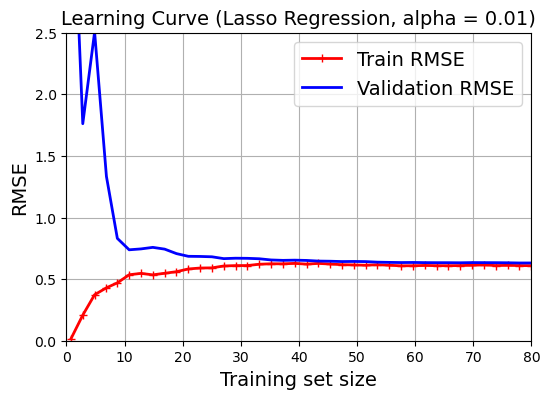

In [267]:
plot_learning_curve(lasso_model, "Lasso Regression, alpha = 0.01", 2.5)

The Lasso model help reduces the overfitting in Polinomial Regression, \
and the result is slightly better than plain Linear Regression, \
because the validation RMSE is slightly lower and the curve is also more stable.

## 6 Apply the best model on test set

We test the model on the test set with the best model: Lasso regression with alpha = 0.01

In [268]:
y_test_pred = lasso_model.predict(X_test)
mse_test_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", mse_test_lasso)

Test MSE: 0.3840337260422702


## I will run with training and testing dataset to see how these models work